In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.special import jn

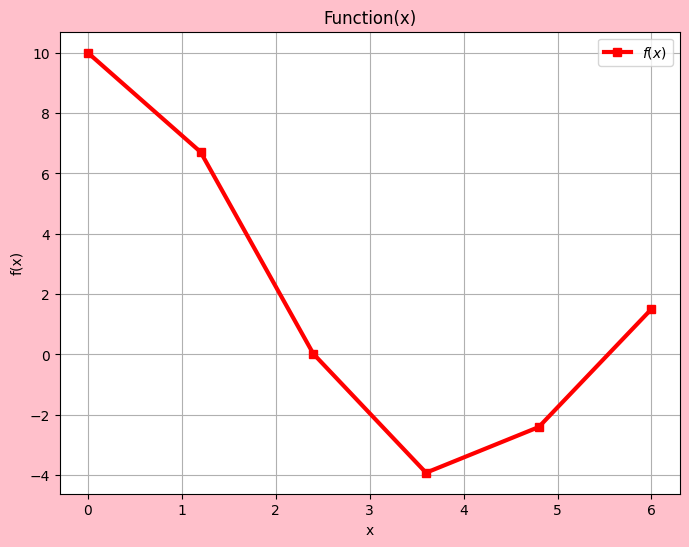

In [2]:
x_values_range = np.arange(0,6, 0.001)


# x and y data


x_data = [0, 1.2, 2.4, 3.6, 4.8, 6]
y_data = [10.0000, 6.7113, 0.0251, -3.9177, -2.4043, 1.5065]

plt.figure(figsize=(8, 6), facecolor="pink")

# Plot the function

plt.plot(x_data, y_data, label="$f(x)$", color="red", marker="s", linestyle="solid", linewidth=3, markersize=6)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function(x)")
plt.legend()
plt.grid()
plt.show()



In [3]:
# lagrange interpolation
def lagrange_interpolation_2(x_values, y_values, x):
    
    n = len(x_values)   # x_values of range 
    result = 0

    for i in range(n):  
        
        f_x = y_values[i]    # f_x value is the corresponding y value for each x value
        
        for j in range(n):
            
            if i == j:
                continue
            f_x = f_x * (x - x_values[j]) / (x_values[i] - x_values[j])       #Application of lagrange method with the help of rule
        result += f_x

    return result

print("Lagrange İnterpolation Result : ")
print(f"f({0})= {lagrange_interpolation_2(x_data, y_data,0)}")
print(f"f({1.2})= {lagrange_interpolation_2(x_data, y_data,1.2)}")
print(f"f({6})= {lagrange_interpolation_2(x_data, y_data,6)}")
print(f"f({4.5})= {lagrange_interpolation_2(x_data, y_data,4.5)}")

Lagrange İnterpolation Result : 
f(0)= 10.0
f(1.2)= 6.7113
f(6)= 1.5065
f(4.5)= -3.2475538940429676


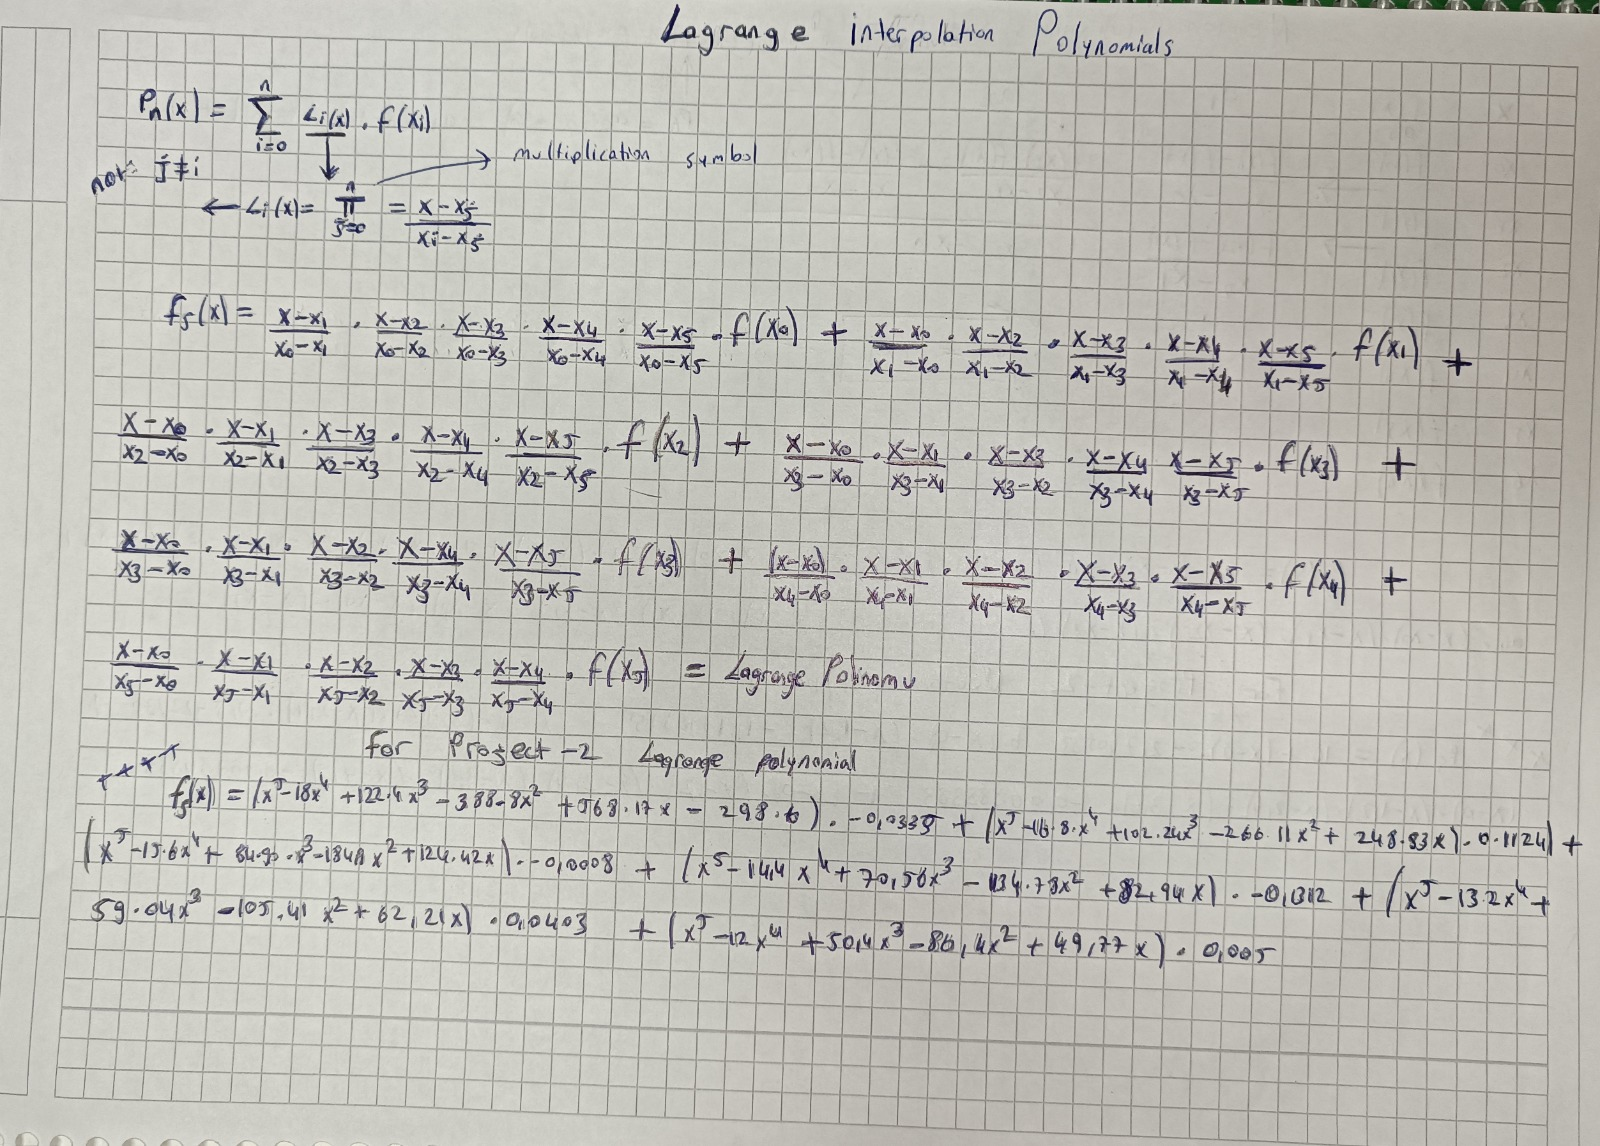

In [4]:
# newton interpolation
def newton_interpolation(x_values,x):
    n = len(x_values)
    array = [[10.0000,0,0,0,0,0],
             [6.7113,0,0,0,0,0],
             [0.0251,0,0,0,0,0],           # first of all , ı add y_data in 5x5 list of list and column and row for initial array format
             [-3.9177,0,0,0,0,0],
             [-2.4043,0,0,0,0,0],
             [1.5065,0,0,0,0,0]]


    #Going step by step and filling the value a0,a1,a2,a3,a4 into the array,
    #finding the preliminary a value for the newton interposition polynomial
    
    for j in range(1, n):           
        for i in range(n - j):                        
            array[i][j] = (array[i + 1][j - 1] - array[i][j - 1]) / (x_values[i + j] - x_values[i])     


    #Applying newton interpolation polynomial

    result = array[0][0]
    for j in range(1, n):
        f_x = array[0][j]
        for i in range(j):
            f_x *= (x - x_values[i])
        result += f_x

    return result

print("Newton İnterpolation Result : ")

print(f"f({0})= {newton_interpolation(x_data,0)}")
print(f"f({1.2})= {newton_interpolation(x_data,1.2)}")
print(f"f({6})= {newton_interpolation(x_data,6)}")
print(f"f({4.5})= {newton_interpolation(x_data,4.5)}")


Newton İnterpolation Result : 
f(0)= 10.0
f(1.2)= 6.7113
f(6)= 1.506500000000007
f(4.5)= -3.2475538940429662


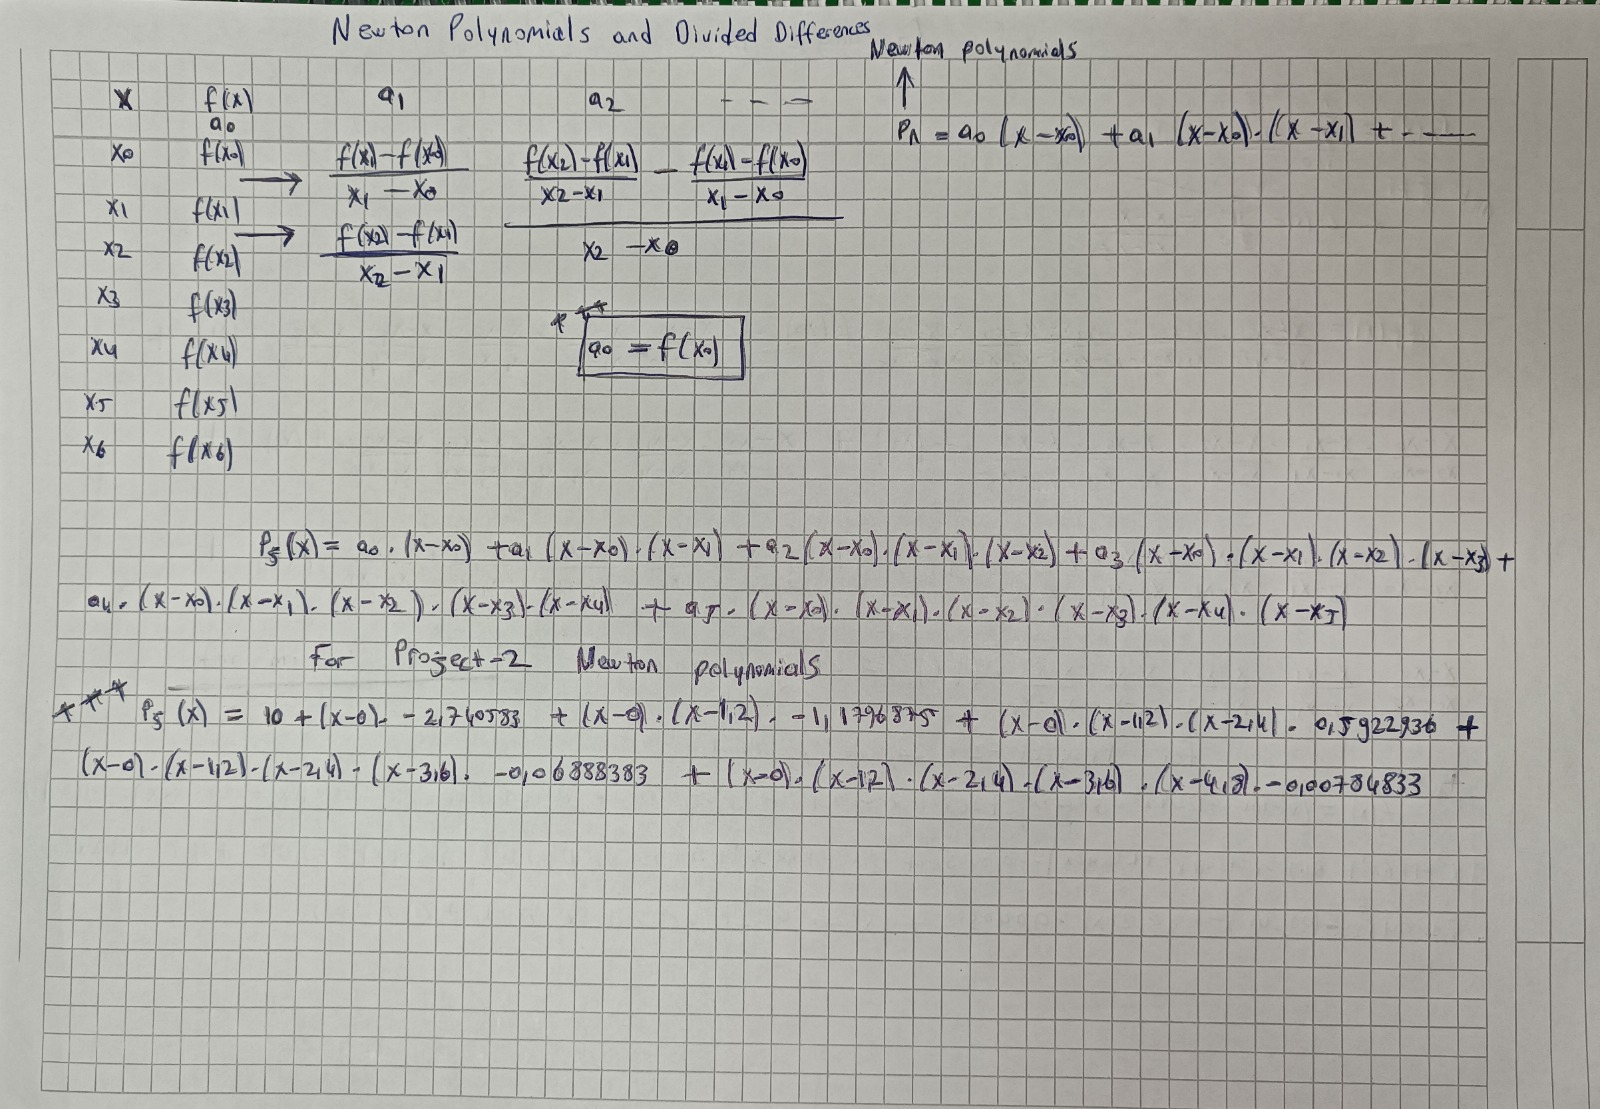

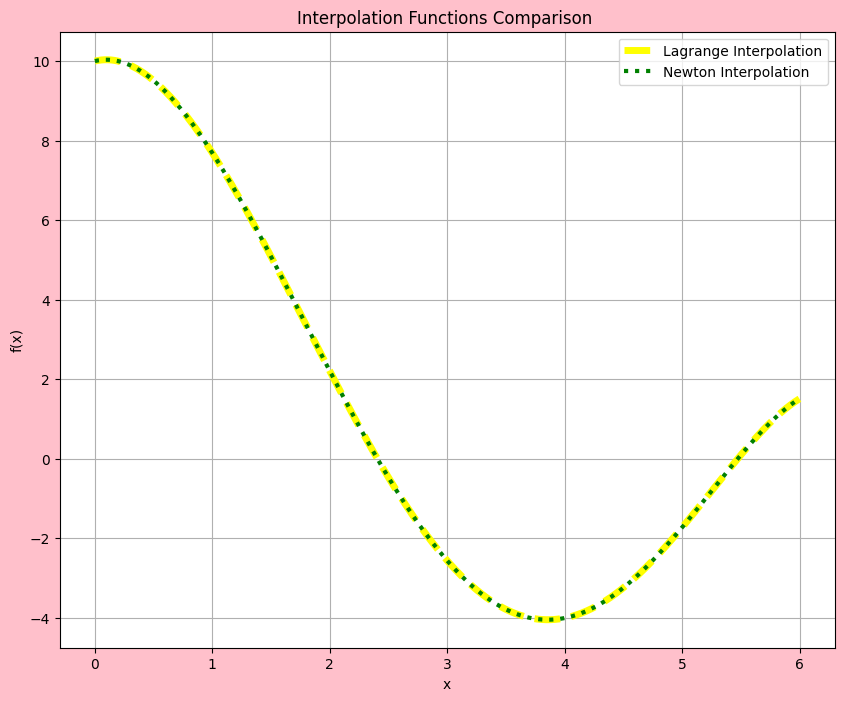

In [5]:
y_lagrange =[]  # store lagrange_interpolation_2 value in list (y_lagrange)
for x in (x_values_range):
    
    y_lagrange.append(lagrange_interpolation_2(x_data, y_data, x))
#Taking values ​​in the range [0,6] for Newton and Lagrange and plotting the graph, finding a corresponding y value for each x value,
#step by step, and keeping the values ​​in lagrange_y and newton_y lists
y_newton = [] 
for x in (x_values_range):
    y_interp = newton_interpolation(x_data, x)     
    y_newton.append(y_interp)


# Plotting the graphs, each on the same graph
plt.figure(figsize=(10, 8),facecolor="pink")
plt.plot(x_values_range, y_lagrange, label="Lagrange Interpolation", color="yellow", linestyle="--", linewidth=5)
plt.plot(x_values_range, y_newton, label="Newton Interpolation", color="green", linestyle=":", linewidth=3)    

plt.xlabel("x")                                                          
plt.ylabel("f(x)")
plt.title("Interpolation Functions Comparison ")
plt.legend()
plt.grid()
plt.show()

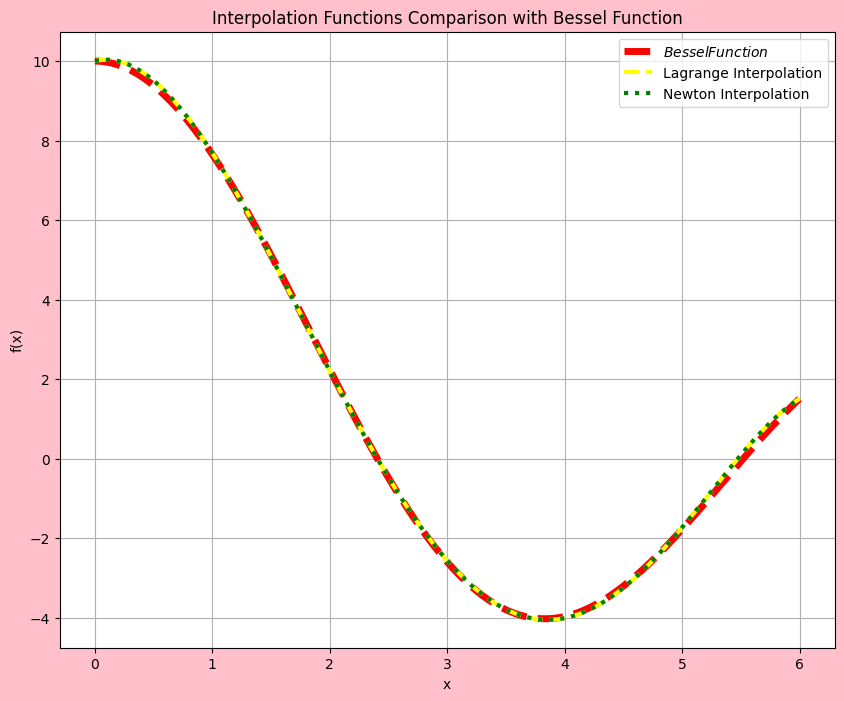

In [6]:

y_bessel = 10 * jn(0, x_values_range)  #I found the y values ​​for each x value in the range [0,6] to draw the graph.


# Plotting the graphs, each on the same graph
plt.figure(figsize=(10, 8), facecolor="pink")
plt.plot(x_values_range, y_bessel, label="$Bessel Function$", color="red", linestyle="--", linewidth=5)
plt.plot(x_values_range, y_lagrange, label="Lagrange Interpolation", color="yellow", linestyle="--", linewidth=3)
plt.plot(x_values_range, y_newton, label="Newton Interpolation", color="green", linestyle=":", linewidth=3)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Interpolation Functions Comparison with Bessel Function") 
plt.legend()
plt.grid()
plt.show()

In [7]:
# It can be seen that the values ​​that make the function zero are between 2 and 3, and the other values ​​are between 5 and 6.
# The probability of finding the first root is seen as [2,3], and the probability of finding the other root is [5,6].

# When I look at the graph of the functions we obtained from (x,y) at Newton, Lagrange and Bessel points, there seem to be 2 places that make zero.
# I think Newton Divided Differences ([2.45,5.45]) sees the first value that makes zero as close to 2, and the 2. A little closer to Lagrange ([2.40,5.40]) and
#  finally Bessel([2.35,5.35]) since the first and second roots in the Bessel function are closer to 2 and 5 respectively, I think. my estimation writing on the list.

my_guess_first_roots=[2.45,        2.40,          2.35] 
                    #Newton     #Lagrange   #Bessel
my_guess_second_roots=[5.45,       5.40,        5.35] 
                     #Newton     #Lagrange   #Bessel

In [8]:
table = [["İnterpolation", "First Estimated Root", "Second Estimated Root"]]
root_number = ["Newton","Larange","Bessel"]

my_guess_first_roots = [2.45, 2.40, 2.35]  # Newton, Lagrange, Bessel
my_guess_second_roots = [5.45, 5.40, 5.35]  # Newton, Lagrange, Bessel

# Compare the real roots with the roots estimated by looking at the graph.
for i in range(3):
    table.append([root_number[i], my_guess_first_roots[i], my_guess_second_roots[i]])   # type: ignore

print(tabulate(table, headers="firstrow", tablefmt="rst", numalign="center"))

===============  ======================  =======================
İnterpolation     First Estimated Root    Second Estimated Root
===============  ======================  =======================
Newton                    2.45                    5.45
Larange                   2.4                      5.4
Bessel                    2.35                    5.35
===============  ======================  =======================


In [9]:
def lagrange_interpolation_function(x):     # lagrange interpolation analatic function

    return ((x**5 - 18*x**4 + 122.4*x**3 - 388.8*x**2 + 568.17*x - 298.6) * (-0.0335) + 
           (x**5 - 16.8*x**4 + 102.24*x**3 - 266.11*x**2 + 248.83*x) * (0.1124) + 
           (x**5 - 15.6*x**4 + 84.96*x**3 - 184.9*x**2 + 124.42*x) * (-0.0008) + 
           (x**5 - 14.4*x**4 + 70.56*x**3 - 134.78*x**2 + 82.94*x) * (-0.1312) + 
           (x**5 - 13.2*x**4 + 59.04*x**3 - 105.41*x**2 + 62.21*x) * (0.0403) + 
           (x**5 - 12*x**4 + 50.4*x**3 - 86.4*x**2 + 49.77*x) * (0.005))

In [10]:

def newton_interpolation_function(x):     # newton interpolation analatic function
    return (10 +
        (x - 0) * (-2.74058333) +
        (x - 0) * (x - 1.2) * (-1.1796875) +
        (x - 0) * (x - 1.2) * (x - 2.4) * (0.5922936) +
        (x - 0) * (x - 1.2) * (x - 2.4) * (x - 3.6) * (-0.06888383) +
        (x - 0) * (x - 1.2) * (x - 2.4) * (x - 3.6) * (x - 4.8) * (-0.00784833))

In [11]:
def bessel_function(x):   #bessel function 

    return 10 * jn(0, x)

In [12]:

def f1_derivative(func, x, h=0.0000001):
    return (func(x + h) - func(x - h)) / (2 * h)   # find any function's derivative

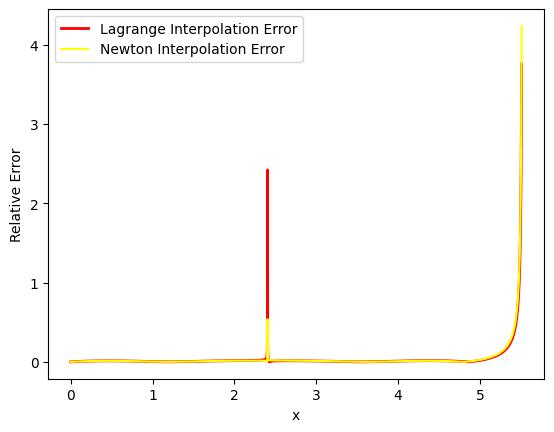

In [13]:

# plotting of the graph of Newton and Lagrange relative errors with the help of Bessel function valuess
x_1_values_range = np.arange(0,5.51, 0.001)


# Keeping each function and polynomial values
lagrange_values = lagrange_interpolation_function(x_1_values_range)
newton_values = newton_interpolation_function(x_1_values_range)
bessel_values = bessel_function(x_1_values_range)

# Relative calculation using the Bessel function value as reference
def calculate_relative_errors(approx_values, real_values):
   
    return abs(approx_values - real_values) / abs(real_values) 

# Calculate relative errors 
lagrange_errors = calculate_relative_errors(lagrange_values, bessel_values)
newton_errors = calculate_relative_errors(newton_values, bessel_values)

# Plot the relative errors
plt.plot(x_1_values_range, lagrange_errors, label="Lagrange Interpolation Error", color="red", linewidth=2)
plt.plot(x_1_values_range, newton_errors, label="Newton Interpolation Error", color="yellow")
plt.xlabel("x")
plt.ylabel("Relative Error")
plt.legend()
plt.show()


In [14]:
# Bisection method
def bisection(function, number_range):
    tolerance = 0.000000001  # tolerance value 10^9
    tf = True
    iteration_list = number_range.copy()  
    n = 0
    board_iteration_list = []       # value of iteration steps
    iteration_list_step = []        # iteration steps 
    while tf:
        n += 1                                # iteration steps
        x_1 = iteration_list[0]               # first element of range    
        x_2 = iteration_list[1]               # second element of range 
        x_3 = (x_1 + x_2) / 2                 # divide first and second values for approving real root
        board_iteration_list.append(x_3)      # keep iteration value  
        if (function(x_1) > 0 and function(x_3) < 0) or (function(x_1) < 0 and function(x_3) > 0):    
            #Checking which range the root is in 
            iteration_list.clear()
            iteration_list.append(min(x_1, x_3)) 
            # determining min value for  new range  
            iteration_list.append(max(x_1, x_3)) 
            # determining max  value for  new range
            if abs((max(iteration_list) - min(iteration_list)) / 2 ** n) < tolerance: 
                # in control according to the tolerance value. If it gets close to the root, we will exit the loop.
                break
        elif (function(x_2) > 0 and function(x_3) < 0) or (function(x_2) < 0 and function(x_3) > 0): 
            #  #Checking which range the root is in
            iteration_list.clear()
            iteration_list.append(min(x_2, x_3))  # determining min value for  new range
            iteration_list.append(max(x_2, x_3))  # determining max  value for  new range
            if abs((max(iteration_list) - min(iteration_list)) / 2 ** n) < tolerance:
                # in control according to the tolerance value. If it gets close to the root, we will exit the loop.
                break
        else:
            attention = " does not approach the tolerance value." 
            # if we do not have any root in range , ı will print this string .
            return f"{attention}"

    for i in range(n):                                                            # add iteration step in list 
        iteration_list_step.append(i) 
           
    table = [["Bisection Iteration Step", "x", "Tolerance"]]                      # show value and iteration step in table 
    
    for i in range(len(iteration_list_step)):
        table.append([iteration_list_step[i]+1, board_iteration_list[i], tolerance]) # type: ignore
    
    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")



print("  Bisection  For  Lagrange İnterpolation Polynomial:")
print(bisection(lagrange_interpolation_function, number_range=[2,3]))
print(bisection(lagrange_interpolation_function, number_range=[5,6]))
print("  Bisection  For  Newton İnterpolation Polynomial:")
print(bisection(newton_interpolation_function, number_range=[2,3]))
print(bisection(newton_interpolation_function, number_range=[5,6]))
print("  Bisection  For  Bessel Function :")
print(bisection(bessel_function, number_range=[2,3]))
print(bisection(bessel_function, number_range=[5,6]))

  Bisection  For  Lagrange İnterpolation Polynomial:
==========================  =======  ===========
 Bisection Iteration Step      x      Tolerance
==========================  =======  ===========
            1                 2.5       1e-09
            2                2.25       1e-09
            3                2.375      1e-09
            4               2.4375      1e-09
            5               2.40625     1e-09
            6               2.39062     1e-09
            7               2.39844     1e-09
            8               2.40234     1e-09
            9               2.4043      1e-09
            10              2.40527     1e-09
            11              2.40479     1e-09
            12              2.40454     1e-09
            13              2.40442     1e-09
            14              2.40436     1e-09
            15              2.40439     1e-09
==========================  =======  ===========
==========================  =======  ===========
 Bisection It

In [15]:
#newton method
def newton(function, number_range):
    tolerance = 0.000000001         # tolerance value
    tf = True                       # loop control
    iteration_list = []             # value of iteration steps
    iteration_list_step = []        # iteration steps

    n = 0
    xn = min(number_range)          # min value of number range 

    while tf:
        n += 1
        x_iteration = xn - function(xn) / f1_derivative(function, xn)   # rule of newton method
        iteration_list.append(x_iteration)                              # add iteration value in list  

        if abs(x_iteration - xn) < tolerance:                          
            break
        else:                # in control according to the tolerance value. If it gets close to the root, we will exit the loop.
            xn = x_iteration                      

    for i in range(n):
        iteration_list_step.append(i)                                   # add iteration step in list 

    table = [["Newton Iteration Step", "x", "Tolerance"]]

    for i in range(n):                                                 # show value and iteration step in table 
        table.append([i+1, iteration_list[i], tolerance]) # type: ignore

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")







print("  Newton  For  Lagrange  İnterpolation Polynomial :")
print(newton(lagrange_interpolation_function, number_range=[2,3]))
print(newton(lagrange_interpolation_function, number_range=[5,6]))
print("  Newton  For  Newton İnterpolation Polynomial :")
print(newton(newton_interpolation_function, number_range=[2,3]))
print(newton(newton_interpolation_function, number_range=[5,6]))
print("  Bisection  For  Bessel Function Polynomial :")
print(newton(bessel_function, number_range=[2,3]))
print(newton(bessel_function, number_range=[5,6]))

  Newton  For  Lagrange  İnterpolation Polynomial :
=======================  =======  ===========
 Newton Iteration Step      x      Tolerance
=======================  =======  ===========
           1             2.38611     1e-09
           2             2.40433     1e-09
           3             2.40439     1e-09
           4             2.40439     1e-09
=======================  =======  ===========
=======================  =======  ===========
 Newton Iteration Step      x      Tolerance
=======================  =======  ===========
           1             5.49505     1e-09
           2             5.47933     1e-09
           3             5.47938     1e-09
           4             5.47938     1e-09
=======================  =======  ===========
  Newton  For  Newton İnterpolation Polynomial :
=======================  =======  ===========
 Newton Iteration Step      x      Tolerance
=======================  =======  ===========
           1             2.38661     1e-09
         

In [16]:
#secant method
def secant(function, number_range):
    tolerance = 0.000000001            # tolerance value
    tf = True                          # loop control
    iteration_list = []                # value of iteration steps
    iteration_list_step = []          

    n = 0                               # iteration steps
    [xn_1, xn] = number_range           # range 

    while tf:
        n += 1
        x_iteration = xn - (function(xn) * (xn - xn_1)) / (function(xn) - function(xn_1))  # apply secant rule 
        iteration_list.append(x_iteration)                                                 # iteration value add in list 

        if abs(x_iteration - xn) < tolerance:
            break                                         
            # in control according to the tolerance value if we have corret root break loop.
        else:
            
            xn_1, xn = xn, x_iteration

    for i in range(n):                                     # iteration step add in list 
        iteration_list_step.append(i)

    table = [["Secant Iteration Step", "x", "Tolerance"]]

    for i in range(n):                                                    # show values in table
        table.append([i+1, iteration_list[i], tolerance]) # type: ignore

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")



print("  Secant  For  Lagrange İnterpolation :")
print(secant(lagrange_interpolation_function, number_range=[2,3]))
print(secant(lagrange_interpolation_function, number_range=[5,6]))
print("  Secant  For  Newton İnterpolation :")
print(secant(newton_interpolation_function, number_range=[2,3]))
print(secant(newton_interpolation_function, number_range=[5,6]))
print("  Secant  For  bessel function :")
print(secant(bessel_function, number_range=[2,3]))
print(secant(bessel_function, number_range=[5,6]))


  Secant  For  Lagrange İnterpolation :
=======================  =======  ===========
 Secant Iteration Step      x      Tolerance
=======================  =======  ===========
           1             2.4615      1e-09
           2             2.3936      1e-09
           3             2.40452     1e-09
           4             2.40439     1e-09
           5             2.40439     1e-09
           6             2.40439     1e-09
=======================  =======  ===========
=======================  =======  ===========
 Secant Iteration Step      x      Tolerance
=======================  =======  ===========
           1             5.54046     1e-09
           2             5.46325     1e-09
           3             5.47959     1e-09
           4             5.47938     1e-09
           5             5.47938     1e-09
           6             5.47938     1e-09
=======================  =======  ===========
  Secant  For  Newton İnterpolation :
=======================  =======  ======

In [17]:
#Values ​​of the first root according to the methods

def show_first__root():
     
    table = [["Lagrange interpolation", "Newton İnterpolation", "Bessel Function"]]

    method=["Bisection Method","Newton Method","Secant Method"]
    
    x_1_roots=[2.40439,2.40439,2.40439]
    x_2_roots=[2.4094,2.40492,2.40492]        #list of value of root
    x_3_roots=[2.40482,2.40483,2.40483]

    for i in range(3):                                                    # show values in table
        table.append([method[i],x_1_roots[i],x_2_roots[i],x_3_roots[i]]) 

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")


print(show_first__root())



================  ========================  ======================  =================
..                 Lagrange interpolation    Newton İnterpolation    Bessel Function
================  ========================  ======================  =================
Bisection Method          2.40439                   2.4094               2.40482
Newton Method             2.40439                  2.40492               2.40483
Secant Method             2.40439                  2.40492               2.40483
================  ========================  ======================  =================


In [18]:
#Values ​​of the second root according to the methods
def show_second__root():
     
    table = [["Lagrange interpolation", "Newton İnterpolation", "Bessel Function"]]

    method=["Bisection Method","Newton Method","Secant Method"]
    
    x_11_roots=[5.4794,5.47398,5.47938]
    x_22_roots=[5.4744,5.47442,5.47442]   #list of value of root
    x_33_roots=[5.52005,5.52008,5.52008]

    for i in range(3):                                                    # show values in table
        table.append([method[i],x_11_roots[i],x_22_roots[i],x_33_roots[i]]) 

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")


print(show_second__root())

================  ========================  ======================  =================
..                 Lagrange interpolation    Newton İnterpolation    Bessel Function
================  ========================  ======================  =================
Bisection Method           5.4794                   5.4744               5.52005
Newton Method             5.47398                  5.47442               5.52008
Secant Method             5.47938                  5.47442               5.52008
================  ========================  ======================  =================


In [19]:
print("Relative errors of polynomials or functions relative to each other for the first root")

 

def first_roots_error():
     
    table = [["Referans value of Lagrange Polynominal", "Newton Polynominal erorr", "Bessel Function erorr"]]

    method=["Bisection Method","Newton Method","Secant Method"]
    
    x_1_roots=[2.40439,2.40439,2.40439]
    x_2_roots=[abs(2.4094-2.40439)/2.40439*100,abs(2.40492-2.40439)/2.40439*100,abs(2.40492-2.40439)/2.40439*100]        #first roots value 
    x_3_roots=[abs(2.40482-2.40439)/2.40439*100,abs(2.40483-2.40439)/2.40439*100,abs(2.40483-2.40439)/2.40439*100]

    for i in range(3):                                                    # show values in table
        table.append([method[i], x_1_roots[i], f" % {x_2_roots[i]}", f" % {x_3_roots[i]}"])  # type: ignore

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")


print(first_roots_error())


def first_roots_error_1():
     
    table = [["Lagrange Polynominal error", "Referans value of Newton Polynominal", "Bessel Function error"]]

    method=["Bisection Method","Newton Method","Secant Method"]
    
    x_1_roots=[abs(2.4094-2.40439)/2.4094*100,abs(2.40439-2.40492)/2.40492*100,abs(2.40439-2.40492)/2.40492*100]
    x_2_roots=[2.4094,2.40492,2.40492]        #first roots value 
    x_3_roots=[abs(2.4094-2.40482)/2.4094*100,abs(2.40483-2.40492)/2.40492*100,abs(2.40483-2.40492)/2.40492*100]


    for i in range(3):  # show values in table
        table.append([method[i], f" % {x_1_roots[i]}",x_2_roots[i], f" % {x_3_roots[i]}"])  # type: ignore

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")


print(first_roots_error_1())






def show_first__root_2():
     
    table = [["Lagrange Polynominal error", "Newton Polynominal error", "Referans value of Bessel Function"]]

    method=["Bisection Method","Newton Method","Secant Method"]
    
    x_1_roots=[abs(2.40439-2.40482)/2.40482*100,abs(2.40439-2.40483)/2.40483*100,abs(2.40439-2.40483)/2.40483*100]
    x_2_roots=[abs(2.40482-2.4094)/2.40482*100,abs(2.40492-2.40483)/2.40483*100,abs(2.40492-2.40483)/2.40483*100]        #first roots value 
    x_3_roots=[2.40482,2.40483,2.40483]

    
    for i in range(3):                                                    # show values in table
        table.append([method[i],f"  % {x_1_roots[i]}",f" % {x_2_roots[i]}",x_3_roots[i]]) # type: ignore

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")

print(show_first__root_2())



Relative errors of polynomials or functions relative to each other for the first root
================  ========================================  ==========================  =======================
..                 Referans value of Lagrange Polynominal   Newton Polynominal erorr    Bessel Function erorr
================  ========================================  ==========================  =======================
Bisection Method                  2.40439                   % 0.20836885862944046       % 0.017883953934268254
Newton Method                     2.40439                   % 0.022043012988756546      % 0.01829985983971893
Secant Method                     2.40439                   % 0.022043012988756546      % 0.01829985983971893
================  ========================================  ==========================  =======================
================  ============================  ======================================  =======================
..                Lagrang

In [20]:
 #relative errors calculation relative to each other

print("Relative errors of polynomials or functions relative to each other for the second root")


def all_of_roots_error1():
     
    table = [["Lagrange Polynominal error", "Newton Polynominal error", "Referans value of Bessel Function"]]

    method=["Bisection Method","Newton Method","Secant Method"]
    
    x_11_roots=[abs(5.52005-5.4794)/5.52005*100,abs(5.52008-5.47398)/5.52008*100,(5.52008-5.47938)/5.52008*100]
    x_22_roots=[abs(5.52005-5.4744)/5.52005*100,abs(5.52008-5.47442)/5.52008*100,(5.52008-5.47442)/5.52008*100]          
    x_33_roots=[5.52005,5.52008,5.52008]

    for i in range(3):                                                    # show values in table
        table.append([method[i],f"  % {x_11_roots[i]}",f" % {x_22_roots[i]}",x_33_roots[i]]) # type: ignore

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")


print(all_of_roots_error1())



def all_of_roots_error2():
    table = [["Referans value of Lagrange Polynomial", "Newton Polynomial error", "Bessel Function error"]]

    method = ["Bisection Method", "Newton Method", "Secant Method"]

    x_11_roots=[5.4794,5.47398,5.47938]
    x_22_roots=[abs(5.4744-5.4794)/5.4794*100,abs(5.47442-5.47398)/5.47398*100,abs(5.47442-5.47938)/5.47938*100]          # second roots
    x_33_roots=[abs(5.52005-5.4794)/5.4794*100,abs(5.52008-5.47398)/5.47398*100,abs(5.52008-5.47938)/5.47938*100]


    for i in range(3):  # show values in table
        table.append([method[i], x_11_roots[i], f" % {x_22_roots[i]}", f" % {x_33_roots[i]}"])  # type: ignore

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")

print(all_of_roots_error2())



def all_of_roots_error3():
    table = [["Lagrange Polynomial error", "Referans value of Newton Polynomial", "Bessel Function error"]]

    method = ["Bisection Method", "Newton Method", "Secant Method"]

    x_11_roots=[(abs(5.4744-5.4794)/5.4744)*100,(abs(5.47442-5.47398)/5.47442)*100,(abs(5.47938-5.47442)/5.47442)*100]
    x_22_roots=[5.4744,5.47442,5.47442]          # second roots
    x_33_roots=[(abs(5.4744-5.52005)/5.4744)*100,(abs(5.47442-5.52008)/5.47442)*100,(abs(5.52008-5.47442)/5.47442)*100]


    for i in range(3):  # show values in table
        table.append([method[i], f" % {x_11_roots[i]}",x_22_roots[i], f" % {x_33_roots[i]}"])  # type: ignore

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")

print(all_of_roots_error3())




Relative errors of polynomials or functions relative to each other for the second root
================  ============================  ==========================  ===================================
..                Lagrange Polynominal error    Newton Polynominal error     Referans value of Bessel Function
================  ============================  ==========================  ===================================
Bisection Method  % 0.7364063731306835          % 0.8269852628146519                      5.52005
Newton Method     % 0.8351328241619691          % 0.8271619251894865                      5.52008
Secant Method     % 0.7373081549542793          % 0.8271619251894865                      5.52008
================  ============================  ==========================  ===================================
================  =======================================  =========================  =======================
..                 Referans value of Lagrange Polynomial   New

In general, in engineering applications, it should be preferred to keep the error rate as low as possible, but this is not always possible and practical. For this reason, I find it acceptable that the results I obtained in the values ​​have a margin of error below 1%, but I think the lower the margin of error, the better. The relative error rate I obtained in the relative calculations I made using the values ​​of the Bessel function as reference is due to the relative error of Lagrange and Newton interpolation and is less.


In conclusion, I learned how to draw graphs based on given data, find the 5th-degree Lagrange interpolation polynomial analytically and numerically, and draw its graph. I also learned how to analytically calculate and graph the Newton-divided difference interpolation polynomial. In my research, I learned about polynomials and how we can superimpose the Bessel function we obtained, and that the Bessel function is a function specific to engineering. I learned to calculate relative error using the bisection method, Newton Raphson method, and secant method and determined the error percentages. I determined that the error rates were lower by using Bessel function values ​​as a reference.


# References

https://atozmath.com/CONM/NumeDiff.aspx?q=LI&q1=1%600%2C1.2%2C2.4%2C3.6%2C4.8%2C6%6010.0000%2C6.7113%2C0.0251%2C-3.9177%2C-2.4043%2C1.5065%604%60LI&dp=8&tm=R&do=1#tblSolution

https://www.youtube.com/watch?v=zdyUwzOm1zw 

https://www.youtube.com/watch?v=53xl0taCbFY  

https://math.libretexts.org/Bookshelves/Differential_Equations/Partial_Differential_Equations_(Walet)/10%3A_Bessel_Functions_and_Two-Dimensional_Problems/10.05%3A_Properties_of_Bessel_functions

https://atozmath.com/CONM/NumeInterPola.aspx?q=BM&q1=1%600%2c1.2%2c2.4%2c3.6%2c4.8%2c6%6010.0000%2c6.7113%2c0.0251%2c-3.9177%2c-2.4043%2c1.5065%3b%604.8%60BM%604&dp=8&tm=R&do=1#PrevPart

https://www.medcalc.org/manual/BesselJ-function.php

https://oer.physics.manchester.ac.uk/PDEs/Notes/jsmath/Notesse37.html


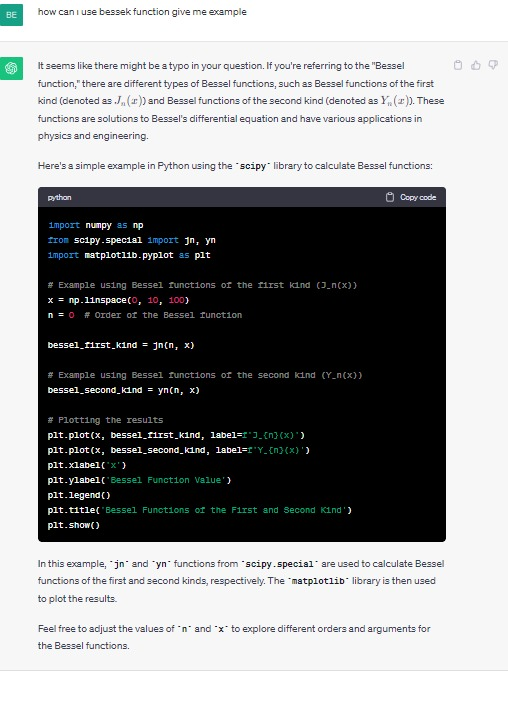